In [100]:
#Import Libraries

%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.dates as mdates
import pandas as pd
import datetime as dt

In [101]:
#Open the HDF5 Datalist that acts as a directory
file = pd.HDFStore("Data-AsOf-2018-10-9.h5","r")
file["Datalist"][195:200]

,Date,Time,Twitch,Stock
195,2018-10-9,16-20,Twitch-2018-10-9-16-20,Stock-2018-10-9-16-20
196,2018-10-9,16-25,Twitch-2018-10-9-16-25,Stock-2018-10-9-16-25
197,2018-10-9,16-30,Twitch-2018-10-9-16-30,Stock-2018-10-9-16-30
198,2018-10-9,16-35,Twitch-2018-10-9-16-35,Stock-2018-10-9-16-35
199,2018-10-9,16-40,Twitch-2018-10-9-16-40,Stock-2018-10-9-16-40


In [102]:
#Open sample dataframe
file["Twitch-2018-10-9-2-30"].head()

,Game,Views,Tags
0,Fortnite,249538,"[Shooter, Battle Royale]"
1,League of Legends,98468,[MOBA]
2,Just Chatting,90901,"[IRL, Non-gaming]"
3,World of Warcraft,39005,[MMORPG]
4,PLAYERUNKNOWN'S BATTLEGROUNDS,31028,"[Shooter, FPS, Battle Royale]"


In [103]:
#A couple of games interested in
games = ["Fortnite", "League of Legends", "World of Warcraft", "PLAYERUNKNOWN'S BATTLEGROUNDS", "Overwatch"]

In [104]:
time = []
df = pd.DataFrame(columns = games)

#Goes through the Twitch data and combine the interested data into a list
for index1, row1 in file["Datalist"].iterrows():
    temp = file[row1["Twitch"]]
    temp = temp[temp["Game"].isin(games)]
    for index2, row2 in temp.iterrows():
        df.at[index1,row2["Game"]] = row2["Views"]
        
    #Parses the time data
    t = [int(x) for x in row1["Twitch"].split("-")[1:]]
    time = time + [dt.datetime(t[0],t[1],t[2],t[3],t[4])]
    

df["Time"] = time
df.head()

,Fortnite,League of Legends,World of Warcraft,PLAYERUNKNOWN'S BATTLEGROUNDS,Overwatch,Time
0,232456,109239,42813,24940,34774,2018-10-09 00:00:00
1,233403,107013,42393,25257,32507,2018-10-09 00:05:00
2,227360,107866,42409,25472,31824,2018-10-09 00:10:00
3,226215,104595,41695,25214,31695,2018-10-09 00:15:00
4,221685,105138,42448,18144,31197,2018-10-09 00:20:00


In [105]:
#toronto = [ x - dt.timedelta(hours = 4) for x in time]

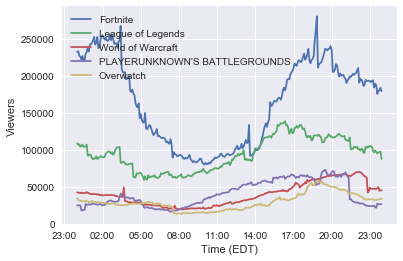

In [106]:
#Visualize raw viewership data
fig, ax = plt.subplots()
for game in df.columns[:-1]:
    ax.plot_date(df["Time"], df[game], marker = "None", linestyle="-")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.legend(df.columns[:-1])
plt.xlabel("Time (EDT)")
plt.ylabel("Viewers")
fig.savefig("October 9th Views.jpg", dpi=200)

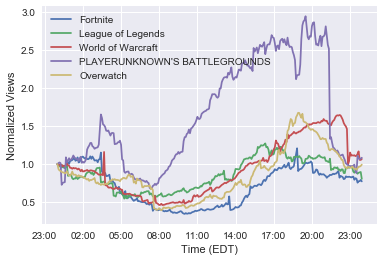

In [108]:
#Normalize Viewership Data

del df["Time"]
df = df/df.iloc[0]
df["Time"] = time

fig, ax = plt.subplots()
for game in df.columns[:-1]:
    ax.plot_date(df["Time"], df[game], marker = "None", linestyle="-")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.legend(df.columns[:-1])
plt.xlabel("Time (EDT)")
plt.ylabel("Normalized Views")
fig.savefig("October 9th Normalized.jpg", dpi=200)

In [109]:
file.close()